<a href="https://colab.research.google.com/github/XueqingWu/Explainable_AI_Global_Explanation/blob/main/Global_Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install shap==0.45.1
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-dtffp6t3/alepython_17608332a0ca459babfe44030ee94517
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-dtffp6t3/alepython_17608332a0ca459babfe44030ee94517
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done


In [2]:

%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import metrics

# Models
import xgboost
from sklearn.model_selection import train_test_split

# XAI
import shap
from alepython import ale_plot
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

np.random.seed(13)

## Load Data

In [3]:

# load dataset
from sklearn.datasets import load_iris

iris = load_iris()
# convert to dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df
# # Subset data to two classes
iris_df = iris_df[iris.target != 2]
iris_df["target"] = iris.target[iris.target != 2]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [4]:
from sklearn.model_selection import train_test_split

# Assuming iris_df is your DataFrame and target is the column you want to predict
y = iris_df["target"].to_numpy()  # Target variable
X = iris_df.drop("target", axis=1)
features=X.columns
X=X.to_numpy()  # Features as numpy array

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train, X_test, y_train, y_test can be used for training and testing

In [5]:
from sklearn.model_selection import train_test_split

# Assuming iris_df is your DataFrame and target is the column you want to predict
y = iris_df["target"]  # Target variable
X = iris_df.drop("target", axis=1)
# features=X.columns
# X=X.to_numpy()  # Features as numpy array

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train, X_test, y_train, y_test can be used for training and testing

In [6]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
83,6.0,2.7,5.1,1.6
53,5.5,2.3,4.0,1.3
70,5.9,3.2,4.8,1.8
45,4.8,3.0,1.4,0.3
44,5.1,3.8,1.9,0.4
39,5.1,3.4,1.5,0.2
22,4.6,3.6,1.0,0.2
80,5.5,2.4,3.8,1.1
10,5.4,3.7,1.5,0.2
0,5.1,3.5,1.4,0.2


## Train Model

In [7]:
# Train XGBoost model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = xgboost.XGBClassifier().fit(X_train, y_train)

## Partial Dependence Plots (PDP)

### Impact of Petal Length

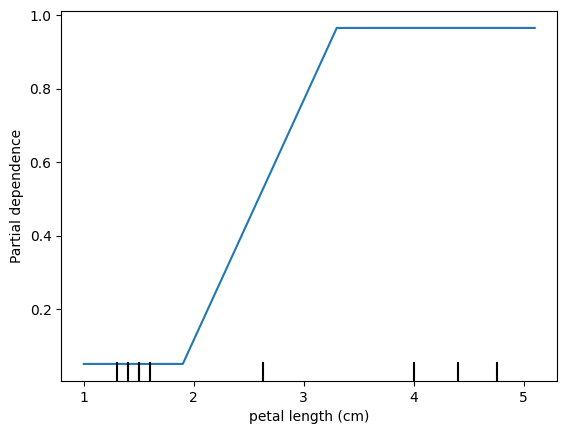

In [12]:

# Choose the feature of interest
features =['petal length (cm)']

# Use PartialDependenceDisplay to plot PDP
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='average') #kind='both'

### Impact of Petal Width

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


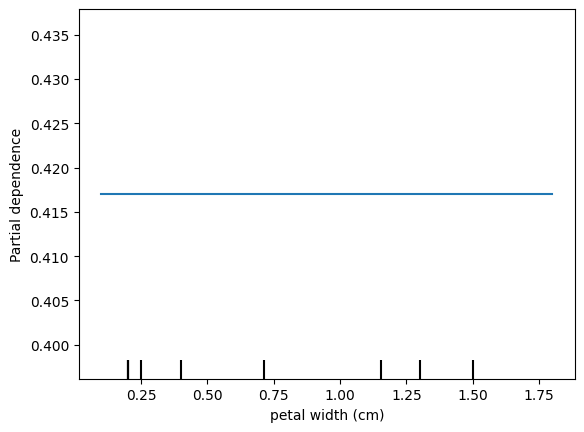

In [13]:
# Choose the feature of interest
features =['petal width (cm)']

# Use PartialDependenceDisplay to plot PDP
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='average') #kind='both'

### ALE Plots

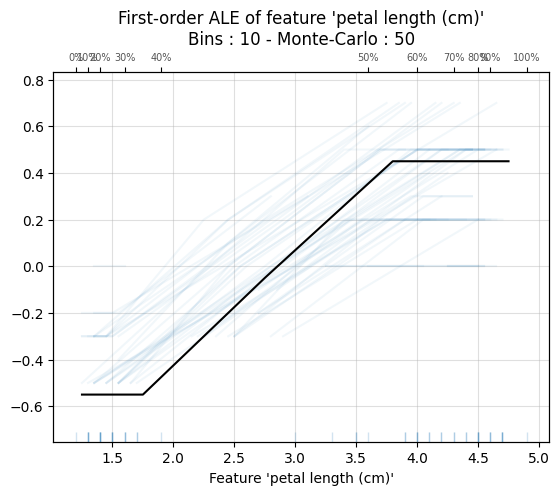

<Axes: title={'center': "First-order ALE of feature 'petal length (cm)'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'petal length (cm)'">

In [14]:
# Use default parameters for 1D Main Effect ALE Plot
ale_plot(model, X_train, 'petal length (cm)', monte_carlo=True)

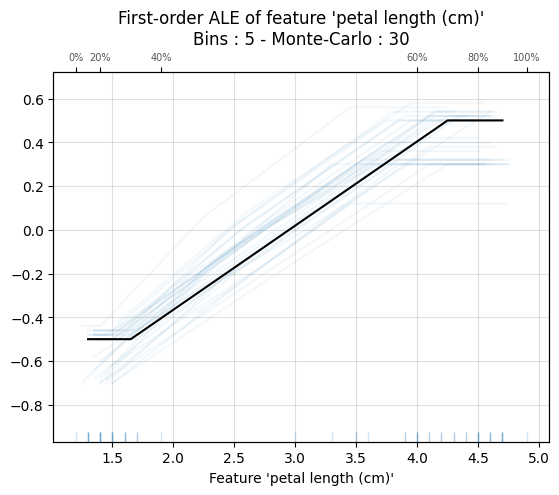

<Axes: title={'center': "First-order ALE of feature 'petal length (cm)'\nBins : 5 - Monte-Carlo : 30"}, xlabel="Feature 'petal length (cm)'">

In [15]:

# Change hyperparameters for 1D Main Effect ALE Plot
ale_plot(
    model,
    X_train,
    "petal length (cm)",
    bins=5,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
)

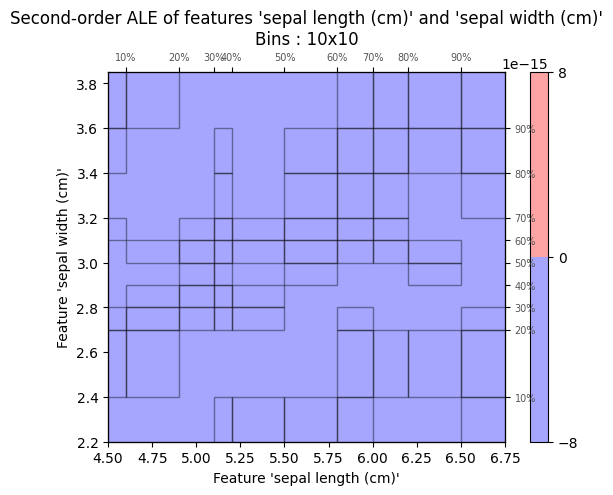

<Axes: title={'center': "Second-order ALE of features 'sepal length (cm)' and 'sepal width (cm)'\nBins : 10x10"}, xlabel="Feature 'sepal length (cm)'", ylabel="Feature 'sepal width (cm)'">

In [16]:
# 2D Second-Order ALE Plot
ale_plot(model, X_train, X_train.columns[:2], bins=10)